In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def load_data(path = "/content/drive/MyDrive/Colab/Data/20news_MLGT/"):
    # Get data from each line with label, doc_id, index & tfidf of its vocab
    def sparse_to_dense(sparse_r_d, vocab_size):
        # Init list size vocal size to store vocal 
        r_d = [0.0 for _ in range(vocab_size)]
            
        # Split space & : in context data of each line 
        # Get index (id vocal of each line) & tfidfs
        indices_and_tfidfs = sparse_r_d.split()
        for index_and_tfidf in indices_and_tfidfs:
            index = int(index_and_tfidf.split(':')[0])
            tfidf = float(index_and_tfidf.split(':')[1])
            r_d[index] = tfidf
        return np.array(r_d)    
                
    # Open file (newsgroup, id, context)
    with open(path + "data_tf_idf.txt") as f:
        data_lines = f.read().splitlines()
    # Get size file vocal TF-IDF
    with open(path + "words_idfs.txt") as f:
        vocab_size = len(f.read().splitlines())

    # Member store info of data points: tf_idf, news group, file name of text d
    data, labels = [], []
    # Iterating sequence of pairs with counter
    for data_id, d in enumerate(data_lines):
        features = d.split('<fff>')
        label, doc_id = int(features[0]), int(features[1])
        r_d = sparse_to_dense(sparse_r_d=features[2], vocab_size=vocab_size)

        # Append data & labels
        data.append(r_d)
        labels.append(label)
    return np.array(data), np.array(labels)

In [4]:
# Load data
X, y = load_data()

# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [5]:
model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape = X_train.shape[1:]),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(20, activation = "softmax")])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14230)             0         
                                                                 
 dense (Dense)               (None, 100)               1423100   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
Total params: 1,429,170
Trainable params: 1,429,170
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train,
                    epochs = 20,
                    validation_data = (X_val, y_val))

Epoch 1/20
354/354 [==============================] - 3s 7ms/step - loss: 0.6971 - accuracy: 0.8763 - val_loss: 0.8623 - val_accuracy: 0.8151
Epoch 2/20
354/354 [==============================] - 2s 6ms/step - loss: 0.6632 - accuracy: 0.8822 - val_loss: 0.8297 - val_accuracy: 0.8124
Epoch 3/20
354/354 [==============================] - 3s 7ms/step - loss: 0.6303 - accuracy: 0.8868 - val_loss: 0.8005 - val_accuracy: 0.8220
Epoch 4/20
354/354 [==============================] - 2s 7ms/step - loss: 0.6011 - accuracy: 0.8902 - val_loss: 0.7821 - val_accuracy: 0.8294
Epoch 5/20
354/354 [==============================] - 2s 6ms/step - loss: 0.5727 - accuracy: 0.8945 - val_loss: 0.7549 - val_accuracy: 0.8315
Epoch 6/20
354/354 [==============================] - 2s 7ms/step - loss: 0.5466 - accuracy: 0.9002 - val_loss: 0.7400 - val_accuracy: 0.8315
Epoch 7/20
354/354 [==============================] - 2s 6ms/step - loss: 0.5225 - accuracy: 0.9030 - val_loss: 0.7120 - val_accuracy: 0.8405
Epoch 

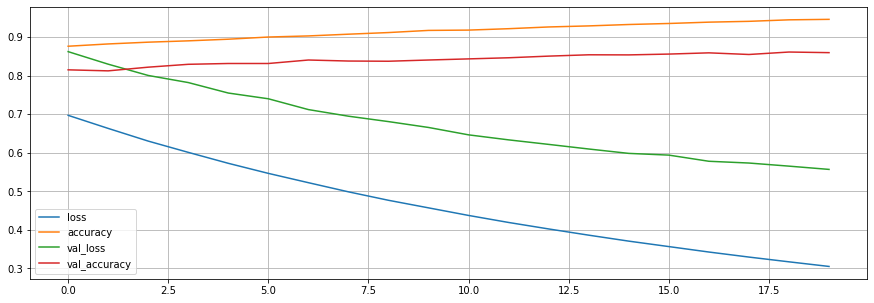

In [23]:
pd.DataFrame(history.history).plot(figsize = (15,5));
plt.grid("True")

In [32]:
# Evaluate parameters on the test set to estimate the generalization error
model.evaluate(X_test, y_test)

118/118 [==============================] - 1s 4ms/step - loss: 0.5441 - accuracy: 0.8607


[0.5441098809242249, 0.8607426881790161]

In [36]:
model.predict(X_test[:1])

array([[2.1597330e-06, 1.9379929e-06, 1.8262326e-04, 1.1174806e-04,
        2.4862072e-04, 2.6666816e-05, 6.7859669e-03, 5.3056669e-05,
        4.5941139e-04, 9.7805846e-01, 1.3587152e-02, 3.8562313e-05,
        4.2068496e-05, 3.2963337e-05, 5.7501879e-06, 6.0016463e-09,
        6.5452713e-07, 6.3673346e-05, 2.8331869e-04, 1.5191481e-05]],
      dtype=float32)

In [37]:
# Return predict newsgroup
np.argmax(model.predict(X_test[:1]), axis= -1)

array([9])